In [ ]:
# TRIP IDよりどういうユーザーがtripをしてるのかを見る。

In [ ]:
import pandas as pd
#trip_df1 = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_trip_data.csv", sep=",")

 #2015/9/1 ~ 2016/8/31
station_df3 = pd.read_csv("babs_open_data_year_3/201608_station_data.csv", sep=",")
status_df3 = pd.read_csv("babs_open_data_year_3/201608_status_data.csv", sep=",")
weather_df3 = pd.read_csv("babs_open_data_year_3/201608_weather_data.csv", sep=",")

trip_df3 = pd.read_csv("babs_open_data_year_3/201608_trip_data.csv", sep=",")

In [17]:
import pandas as pd
#trip_df1 = pd.read_csv("babs_open_data_year_1/201402_babs_open_data/201402_trip_data.csv", sep=",")

 #2015/9/1 ~ 2016/8/31
trip_df3 = pd.read_csv("babs_open_data_year_3/201608_trip_data.csv", sep=",")


In [2]:
trip_df3.shape

(313689, 11)

In [3]:
trip_df3.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,746,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,213,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,574,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107


In [4]:
trip_df3.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
313684,1338404,511,8/31/2016 23:05,Davis at Jackson,42,8/31/2016 23:14,Post at Kearny,47,370,Subscriber,94109
313685,1338405,701,8/31/2016 23:06,San Francisco Caltrain (Townsend at 4th),70,8/31/2016 23:17,Spear at Folsom,49,175,Subscriber,94133
313686,1338406,457,8/31/2016 23:06,Davis at Jackson,42,8/31/2016 23:13,Spear at Folsom,49,504,Subscriber,94111
313687,1338407,260,8/31/2016 23:09,Embarcadero at Bryant,54,8/31/2016 23:14,Steuart at Market,74,226,Subscriber,94114
313688,1338408,378,8/31/2016 23:32,Washington at Kearny,46,8/31/2016 23:38,Embarcadero at Sansome,60,667,Subscriber,94111


In [5]:
trip_df3["Trip ID"].value_counts().count() # Trip IDは全部ばらばら

313689

In [3]:
from datetime import datetime as dt
trip_df3["Start Date"] = trip_df3["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

In [4]:
from datetime import datetime as dt
trip_df3["End Date"] = trip_df3["End Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

In [5]:
%matplotlib inline
import seaborn as sns

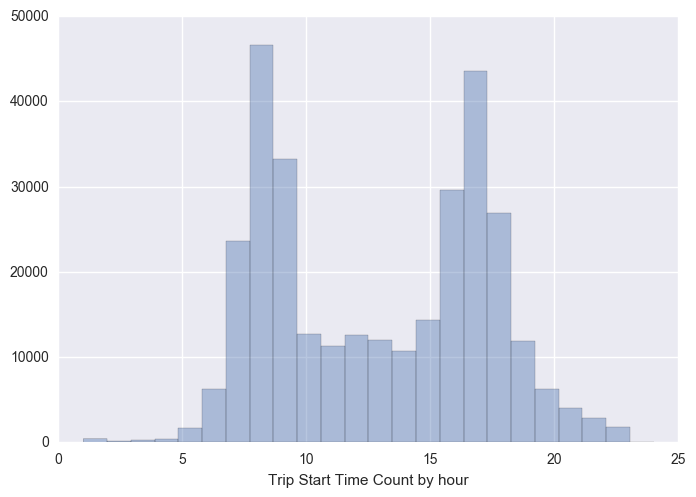

In [47]:
start_datetime = trip_df3.groupby(["Trip ID"])["Start Date"].first().reset_index()
df_start_date = pd.DataFrame(start_datetime)
sns.distplot(df_start_date["Start Date"].dt.hour, kde=False, rug=False, axlabel="Trip Start Time Count by hour",hist_kws={"range": [1,24]}, bins=24)

In [43]:
end_datetime = trip_df3.groupby(["Trip ID"])["End Date"].first().reset_index()
df_end_date = pd.DataFrame(end_datetime)

In [44]:
#sns.distplot(df_date["End Date"].dt.hour, kde=False, rug=False, axlabel="Trip End Time Count by hour",hist_kws={"range": [1,24]}, bins=24)
df_end_date["End Date"] = df_end_date["End Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

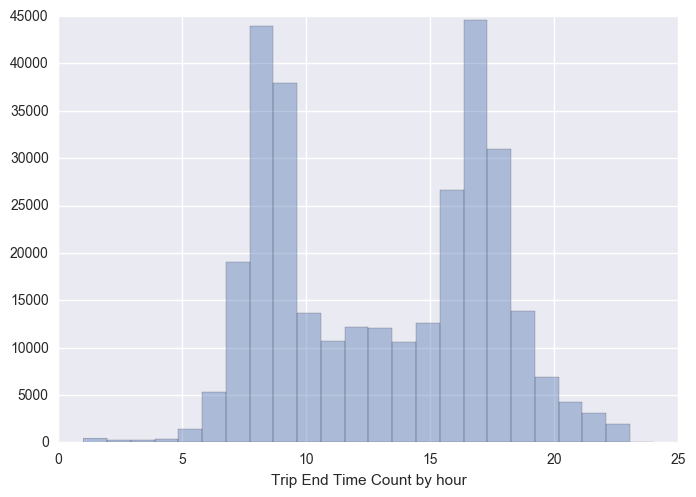

In [42]:
sns.distplot(df_end_date["End Date"].dt.hour, kde=False, rug=False, axlabel="Trip End Time Count by hour",hist_kws={"range": [1,24]}, bins=24)

In [18]:
cus_df = trip_df3[trip_df3["Subscriber Type"] == "Customer"]
sub_df = trip_df3[trip_df3["Subscriber Type"] == "Subscriber"]

In [51]:
cus_df.shape

(33596, 11)

In [53]:
sub_df.shape

(280093, 11)

In [ ]:
Subscriberの利用の方が多い（28万Trip）
Customerの利用の方が少ない（3.4万Trip）

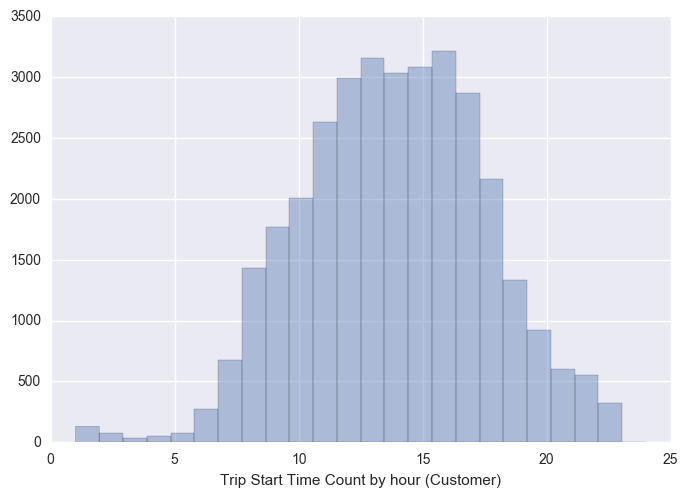

In [65]:
start_datetime = cus_df.groupby(["Trip ID"])["Start Date"].first().reset_index()
df_start_date = pd.DataFrame(start_datetime)
#df_end_date["Start Date"] = df_end_date["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))
sns.distplot(df_start_date["Start Date"].dt.hour, kde=False, rug=False, axlabel="Trip Start Time Count by hour (Customer)",hist_kws={"range": [1,24]}, bins=24)

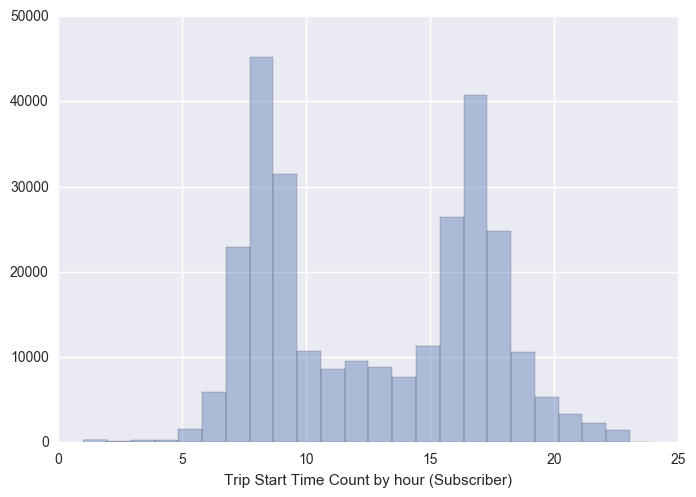

In [64]:
start_datetime = sub_df.groupby(["Trip ID"])["Start Date"].first().reset_index()
df_start_date = pd.DataFrame(start_datetime)
#df_end_date["Start Date"] = df_end_date["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))
sns.distplot(df_start_date["Start Date"].dt.hour, kde=False, rug=False, axlabel="Trip Start Time Count by hour (Subscriber)",hist_kws={"range": [1,24]}, bins=24)

In [61]:
from datetime import datetime as dt
#trip_df3["Start Date"] = trip_df3["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))
trip_df3["End Date"] = trip_df3["End Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

In [60]:
sns.barplot(x='', y='survived', data=titanic, hue='class')

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,746,2015-09-01 00:10:00,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,969,2015-09-01 00:15:00,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,233,2015-09-01 00:15:00,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,213,2015-09-01 01:29:00,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,574,2015-09-01 01:33:00,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107


In [72]:
cus_df.size

369556

In [69]:
sub_df.shape

(280093, 11)

In [77]:
len(sub_df.index)

280093

(-1.0055027431374588, 1.006137685518615, -1.0015607498784866, 1.0)

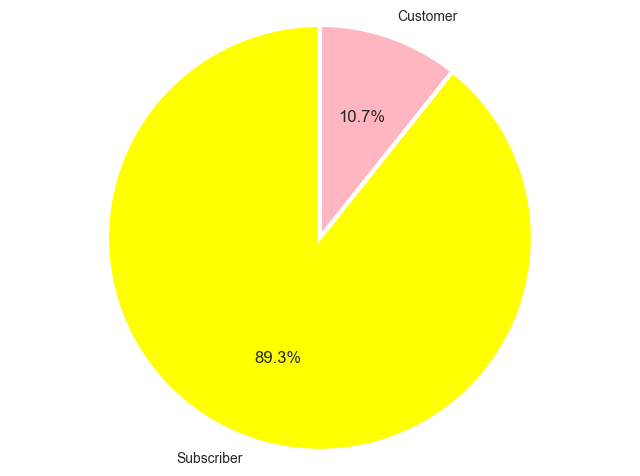

In [83]:
import numpy as np
import matplotlib.pyplot as plt
 
# 円グラフを描画
label = ["Customer", "Subscriber"]

x = np.array([len(cus_df.index),len(sub_df.index)])
colors = ["lightpink", "yellow", "gold", "slateblue", "lightcoral"]
plt.pie(x, labels=label,counterclock=False, autopct='%1.1f%%',startangle=90, colors=colors,wedgeprops={'linewidth': 3, 'edgecolor':"white"})
plt.axis('equal')


In [84]:
trip_df3["Subscriber Type"].value_counts()

Subscriber    280093
Customer       33596
Name: Subscriber Type, dtype: int64

In [86]:
trip_df3["Duration"] /= 60 # minに修正

In [97]:
trip_df3["Duration"].describe()

count    313689.000000
mean         13.813564
std          39.740051
min           1.000000
25%           5.900000
50%           8.650000
75%          12.250000
max        1438.750000
Name: Duration, dtype: float64

In [100]:
pd.qcut(trip_df3["Duration"], 100).value_counts(sort=False)

[1, 2.167]           3181
(2.167, 2.617]       3158
(2.617, 2.917]       3209
(2.917, 3.15]        3163
(3.15, 3.333]        3225
(3.333, 3.483]       2991
(3.483, 3.633]       3241
(3.633, 3.767]       2976
(3.767, 3.917]       3398
(3.917, 4.05]        3135
(4.05, 4.183]        3183
(4.183, 4.317]       3119
(4.317, 4.45]        3081
(4.45, 4.583]        3132
(4.583, 4.7]         2913
(4.7, 4.833]         3318
(4.833, 4.967]       3317
(4.967, 5.0833]      2941
(5.0833, 5.2]        2967
(5.2, 5.333]         3474
(5.333, 5.45]        3115
(5.45, 5.567]        3148
(5.567, 5.667]       2817
(5.667, 5.783]       3198
(5.783, 5.9]         3279
(5.9, 6.0167]        3278
(6.0167, 6.117]      2814
(6.117, 6.233]       3327
(6.233, 6.35]        3212
(6.35, 6.467]        3245
                     ... 
(11.333, 11.5]       3100
(11.5, 11.683]       3215
(11.683, 11.867]     3178
(11.867, 12.05]      2992
(12.05, 12.25]       3209
(12.25, 12.45]       3160
(12.45, 12.667]      3049
(12.667, 12.

[<matplotlib.text.Text at 0x12b412908>, <matplotlib.text.Text at 0x12b33c860>]

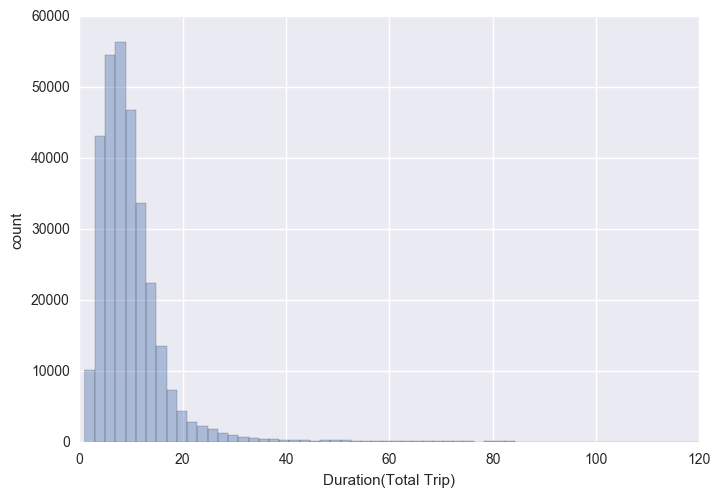

In [105]:
# target is 120以下
trip_d_less_than_120 = trip_df3[trip_df3["Duration"] <= 120]
tx = sns.distplot(trip_d_less_than_120["Duration"], kde=False, rug=False, bins=60)
tx.set(xlabel='Duration(Total Trip)', ylabel='count')

[<matplotlib.text.Text at 0x1281dceb8>, <matplotlib.text.Text at 0x12b8e3940>]

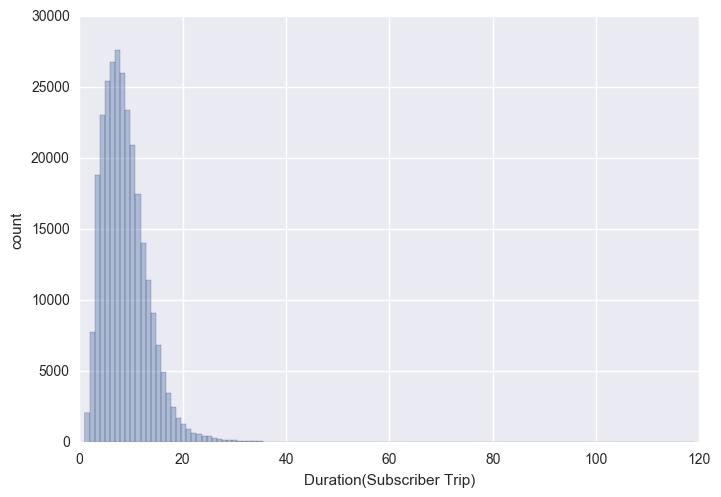

In [107]:
trip_s_d_less_than_120 = trip_d_less_than_120[trip_d_less_than_120["Subscriber Type"] == "Subscriber"]
tx = sns.distplot(trip_s_d_less_than_120["Duration"], kde=False, rug=False, bins=120)
tx.set(xlabel='Duration(Subscriber Trip)', ylabel='count')

In [109]:
pd.qcut(trip_s_d_less_than_120["Duration"], 5).value_counts(sort=False)

[1, 5.117]            56137
(5.117, 7.2]          56198
(7.2, 9.3]            55698
(9.3, 12.133]         55968
(12.133, 119.0833]    55770
Name: Duration, dtype: int64

In [112]:
trip_s_d_less_than_120["Duration"].describe()

count    279771.000000
mean          8.991240
std           5.214879
min           1.000000
25%           5.650000
50%           8.200000
75%          11.266667
max         119.083333
Name: Duration, dtype: float64

[<matplotlib.text.Text at 0x12955c7f0>, <matplotlib.text.Text at 0x128314a20>]

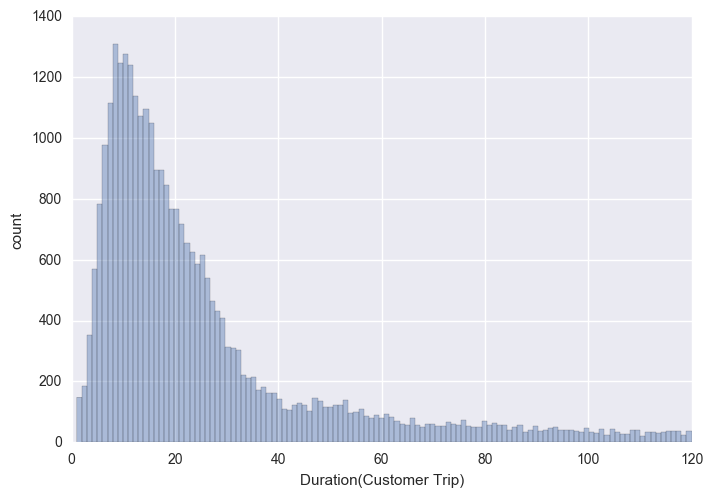

In [108]:
trip_c_d_less_than_120 = trip_d_less_than_120[trip_d_less_than_120["Subscriber Type"] == "Customer"]
tx = sns.distplot(trip_c_d_less_than_120["Duration"], kde=False, rug=False, bins=120)
tx.set(xlabel='Duration(Customer Trip)', ylabel='count')

In [110]:
pd.qcut(trip_c_d_less_than_120["Duration"], 5).value_counts(sort=False)

[1, 9.417]          6055
(9.417, 14.517]     6065
(14.517, 21.433]    6035
(21.433, 35]        6052
(35, 119.983]       6048
Name: Duration, dtype: int64

In [113]:
trip_c_d_less_than_120["Duration"].describe()

count    30255.000000
mean        25.593190
std         23.371339
min          1.000000
25%         10.650000
50%         17.600000
75%         29.566667
max        119.983333
Name: Duration, dtype: float64

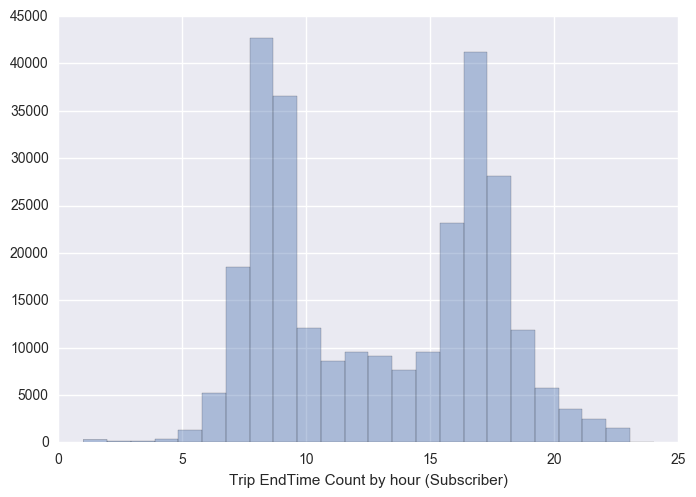

In [7]:
start_datetime = sub_df.groupby(["Trip ID"])["End Date"].first().reset_index()
df_start_date = pd.DataFrame(start_datetime)
#df_end_date["Start Date"] = df_end_date["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))
sns.distplot(df_start_date["End Date"].dt.hour, kde=False, rug=False, axlabel="Trip End Time Count by hour (Subscriber)",hist_kws={"range": [1,24]}, bins=24)

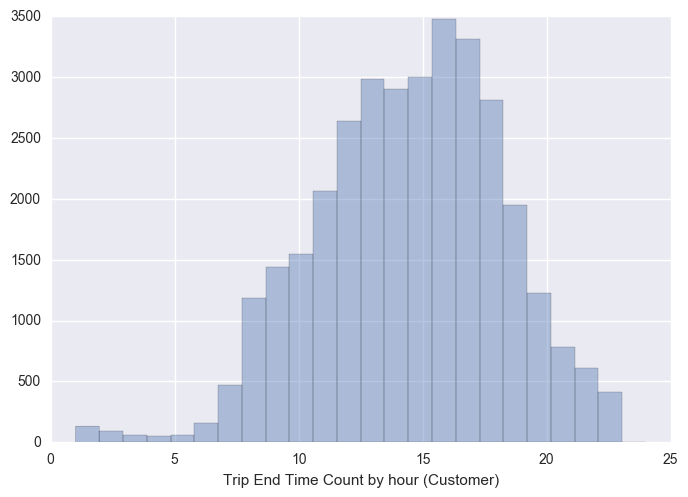

In [9]:
start_datetime = cus_df.groupby(["Trip ID"])["End Date"].first().reset_index()
df_start_date = pd.DataFrame(start_datetime)
#df_end_date["Start Date"] = df_end_date["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))
sns.distplot(df_start_date["End Date"].dt.hour, kde=False, rug=False, axlabel="Trip End Time Count by hour (Customer)",hist_kws={"range": [1,24]}, bins=24)

In [20]:
sub_df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913465,12.433333,9/1/2015 0:10,San Francisco Caltrain 2 (330 Townsend),69,9/1/2015 0:23,San Francisco City Hall,58,238,Subscriber,94107
1,913466,16.150000,9/1/2015 0:15,Clay at Battery,41,9/1/2015 0:31,Washington at Kearny,46,16,Subscriber,94133
2,913467,3.883333,9/1/2015 0:15,Davis at Jackson,42,9/1/2015 0:19,Commercial at Montgomery,45,534,Subscriber,94111
3,913468,3.550000,9/1/2015 1:29,Clay at Battery,41,9/1/2015 1:32,Steuart at Market,74,312,Subscriber,94107
4,913469,9.566667,9/1/2015 1:33,Steuart at Market,74,9/1/2015 1:42,San Francisco Caltrain 2 (330 Townsend),69,279,Subscriber,94107


[<matplotlib.text.Text at 0x111becc18>, <matplotlib.text.Text at 0x10b5a6390>]

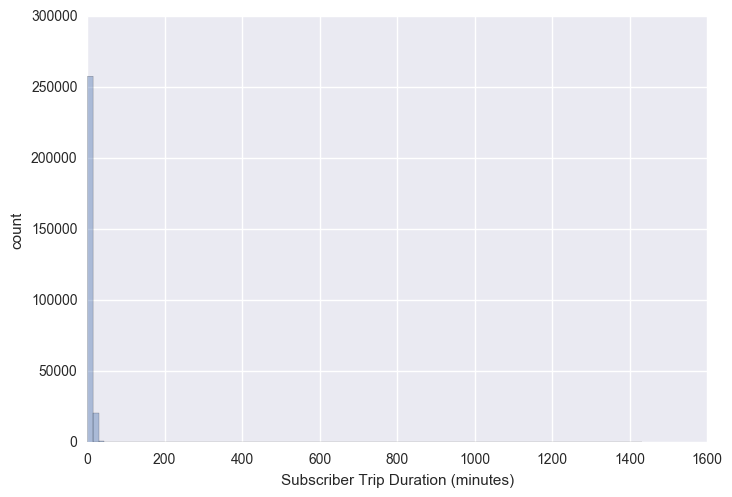

In [29]:
tx = sns.distplot(sub_df["Duration"], kde=False, rug=False, bins=100)
tx.set(xlabel='Subscriber Trip Duration (minutes)', ylabel='count')

In [30]:
#60分より多いか、否かで分類
less_than_60 = sub_df[sub_df["Duration"]<=60]



In [31]:
more_than_60 = sub_df[sub_df["Duration"]>60]

In [34]:
less_than_60.shape[0]/sub_df.shape[0]

0.9978114411998872

In [ ]:
more_than_60

In [25]:
cus_df["Duration"] /= 60

/Users/egusahiroaki/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[<matplotlib.text.Text at 0x1111d7898>, <matplotlib.text.Text at 0x110200e48>]

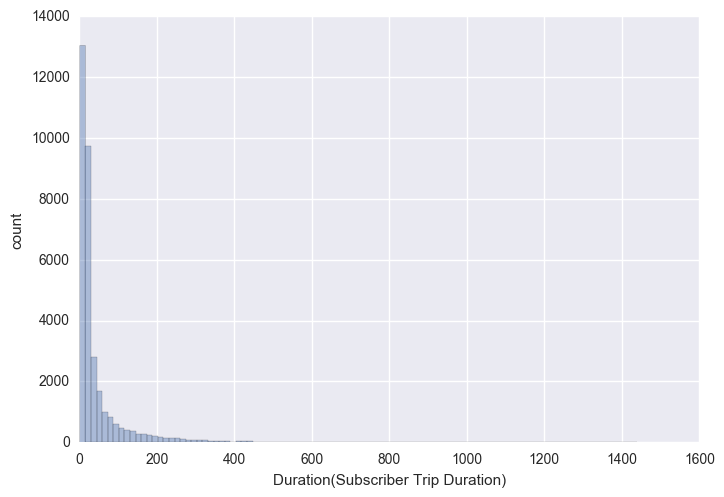

In [27]:
tx = sns.distplot(cus_df["Duration"], kde=False, rug=False, bins=100)
tx.set(xlabel='Duration(Subscriber Trip Duration)', ylabel='count')

In [40]:
c_less_than_60 = cus_df[cus_df["Duration"]<=60]
c_more_than_60 = cus_df[cus_df["Duration"]>60]


In [41]:
c_less_than_60.shape[0]/cus_df.shape[0]

0.814382664602929

In [45]:
sub_df["Start Date"] = sub_df["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

/Users/egusahiroaki/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
cus_df["Start Date"] = cus_df["Start Date"].apply(lambda d: dt.strptime(str(d), "%m/%d/%Y %H:%M"))

/Users/egusahiroaki/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


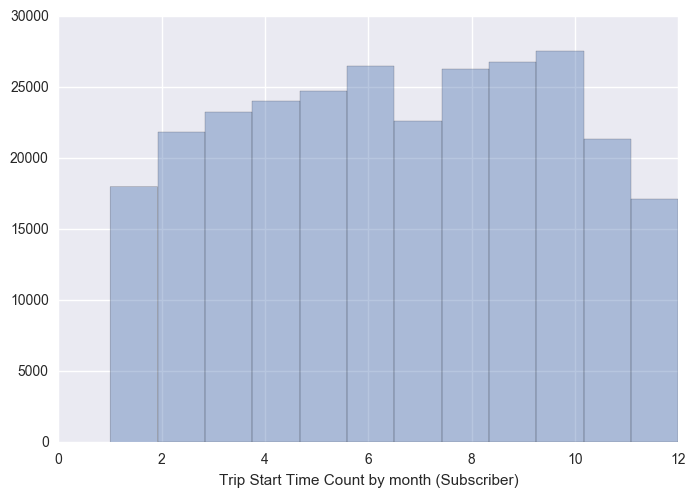

In [51]:
from datetime import datetime as dt

sns.distplot(sub_df["Start Date"].dt.month, kde=False, rug=False, axlabel="Trip Start Time Count by month (Subscriber)",hist_kws={"range": [1,12]}, bins=12)

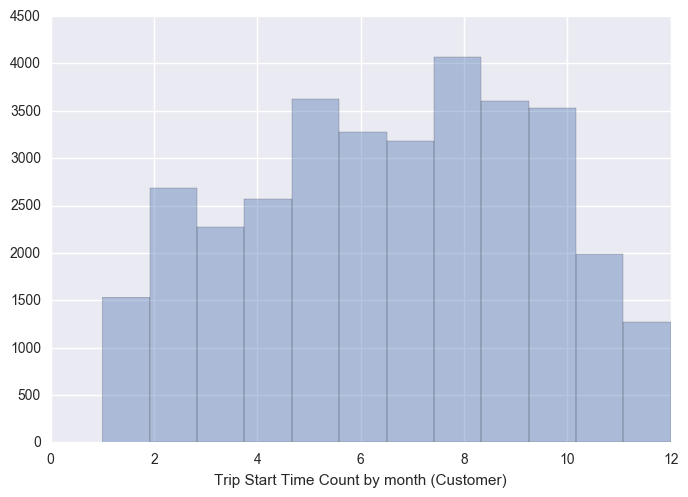

In [56]:
sns.distplot(cus_df["Start Date"].dt.month, kde=False, rug=False, axlabel="Trip Start Time Count by month (Customer)",hist_kws={"range": [1,12]}, bins=12)

In [53]:
cus_df.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
158,913658,11.283333,9/1/2015 7:54,San Francisco Caltrain 2 (330 Townsend),69,2015-09-01 08:05:00,Civic Center BART (7th at Market),72,353,Customer,78233
173,913675,12.550000,9/1/2015 8:01,5th at Howard,57,2015-09-01 08:13:00,Clay at Battery,41,385,Customer,94103
272,913796,24.483333,9/1/2015 8:28,University and Emerson,35,2015-09-01 08:53:00,University and Emerson,35,698,Customer,94062
284,913810,7.133333,9/1/2015 8:30,Embarcadero at Sansome,60,2015-09-01 08:38:00,Steuart at Market,74,137,Customer,nil
303,913830,21.750000,9/1/2015 8:37,Embarcadero at Sansome,60,2015-09-01 08:59:00,Yerba Buena Center of the Arts (3rd @ Howard),68,585,Customer,92562
